# **Problem 1 \[30%]**
To learn to use R (https://www.r-project.org/) or Python, read the labs in Chapter 2 of
the textbook. We recommend that you use quarto notebooks with RStudio to typeset your
solutions. Other options exist for Python

## 1. Download the advertising dataset (Advertising.csv) from https://www.statlearning.c
om/s/Advertising.csv and load it into R/Python.*italicized text*

In [ ]:
import pandas as pd
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## 2. What are the minimum, maximum, and mean value of each feature?

|      | TV       | Radio  | Newspaper |
|------|----------|--------|-----------|
| Mean | 147.0425 | 23.264 | 30.554    |
| Min  | 0.7      | 0.0    | 0.3       |
| Max  |    296.4 | 49.6   | 114.0     |

## 3. Produce a scatterplot matrix of all variables

<Axes: xlabel='TV', ylabel='sales'>

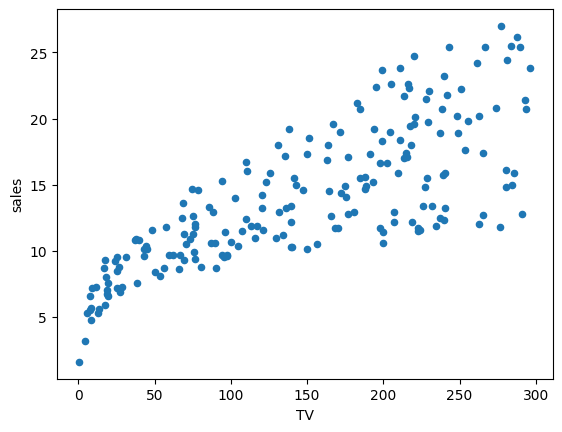

In [ ]:
df.plot.scatter(x="TV", y="sales")

<Axes: xlabel='radio', ylabel='sales'>

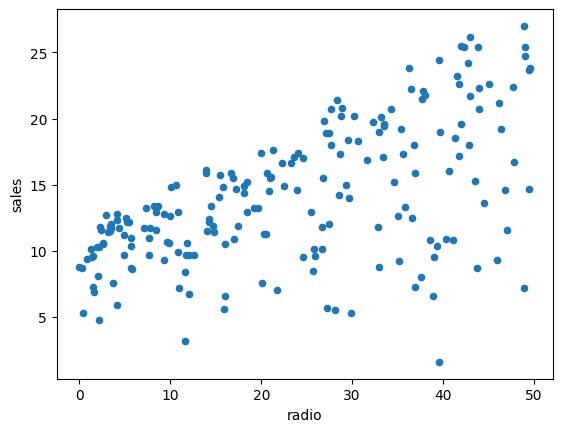

In [ ]:
df.plot.scatter(x="radio", y="sales")

<Axes: xlabel='newspaper', ylabel='sales'>

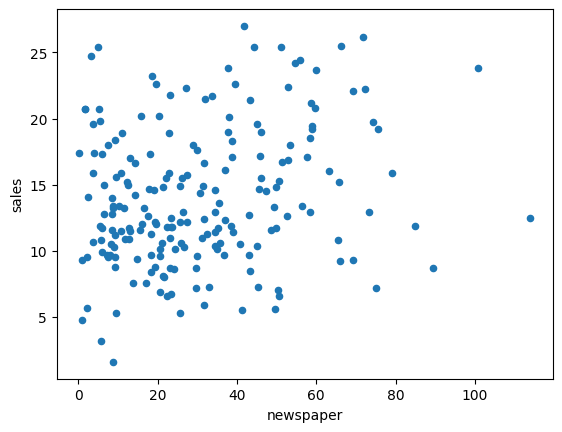

In [ ]:
df.plot.scatter(x="newspaper", y="sales")

## 4. Produce a histogram of TV advertising

<Axes: ylabel='Frequency'>

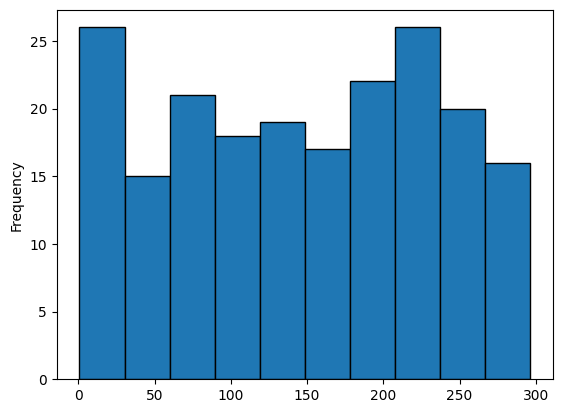

In [ ]:
df['TV'].plot.hist(edgecolor='black')

# **Problem 2 [30%]**

Consider the following bivariate distribution 𝑝(𝑥, 𝑦) of two discrete random variables 𝑋 and 𝑌 :

|    | x1   | x2   | x3   | x4   | x5   |
|----|------|------|------|------|------|
| y1 | 0.01 | 0.02 | 0.03 | 0.1  | 0.1  |
| y2 | 0.05 | 0.1  | 0.05 | 0.07 | 0.2  |
| y3 | 0.1  | 0.05 | 0.03 | 0.05 | 0.04 |


In [ ]:
import pandas as pd

data = {
    "x1": [0.01, 0.05, 0.1],
    "x2": [0.02, 0.1,  0.05],
    "x3": [0.03, 0.05, 0.03],
    "x4": [0.1,  0.07, 0.05],
    "x5": [0.1,  0.2,  0.04]
}

index = ["y1", "y2", "y3"]

df = pd.DataFrame(data, index=index)

df

,x1,x2,x3,x4,x5
y1,0.01,0.02,0.03,0.10,0.10
y2,0.05,0.10,0.05,0.07,0.20
y3,0.10,0.05,0.03,0.05,0.04


## 1. Verify that this is a valid probability distribution.

In [ ]:
#axix=1 sums columns into indices, axis=0 sums indices
sum = df.sum(axis=1).sum(axis=0)
sum

np.float64(1.0)

Since for all values of x in X, *0 < x < X* and the sum of all p(x,y) in X,Y is 1, p(x,y) is a valid probability distribution

## 2. Compute the marginal distributions 𝑝(𝑥) and 𝑝(𝑦) for all values 𝑥 and 𝑦

In [ ]:
ymarg = df.sum(axis=1)
ymarg


,0
y1,0.26
y2,0.47
y3,0.27


In [ ]:
xmarg = df.sum(axis=0)
xmarg

,0
x1,0.16
x2,0.17
x3,0.11
x4,0.22
x5,0.34


## 3. The conditional distributions 𝑝(𝑥 ∣ 𝑌 = 𝑦1) and 𝑝(𝑦 ∣ 𝑋 = `𝑥3`).

In [ ]:
df.loc["y1"]

,y1
x1,0.01
x2,0.02
x3,0.03
x4,0.10
x5,0.10


In [58]:
df['x3']

,x3
y1,0.03
y2,0.05
y3,0.03


# **Problem 3 [30%]**

Based on a true story, according to: The Drunkard’s Walk: How Randomness Rules Our Lives,
Leonard Mlodinow. A diagnosis of a rare disease does not always mean what you think.

Suppose that you applied for life insurance and underwent a physical exam. The bad news is
that your application was rejected because you tested positive for HIV. The test’s sensitivity
is 99.7% and specificity is 98.5% [https://en.wikipedia.org/wiki/Diagnosis_of_HIV/AIDS#Accuracy_of_HIV_testing]. However, after studying the CDC website, you find that in your
ethnic group (age, gender, race, …) only one in 25,000 people is actually infected. What is the
probability that you actually have HIV conditional on having a positive test?

In the statement above:
* Sensitivity refers to the probability of a positive test conditioned on truly having the
condition.
* Specificity refers to the probability of a negative test conditioned on not having the
condition.

Please complete the following steps:

## 1. Define the random variables that can be used to represent this problem

X is the probability that an HIV test is positive

Y is the probability that HIV is present

## 2. Express probabilities given in the statement of the problem


p(x=1 | y=1) = .997

p(x=1 | y=0) = 1-.985 = .015

p(y=1) = 1/25000 = .00004

## 3. Give the formula that answers the question of having HIV when a test is positive?



p(Y=y|X=x) = (p(X=x|Y = y) * p(Y=Y))/ (p(X=x))


## 4. Compute the probability

p(Y=1|X=1) = (p(X=1|Y=1) * p(Y=1))/ (p(X=1))

p(X=1) = p(X=1|Y=1) \* p(Y=1) + p(X=1|Y=0) \* p(Y=0)

p(X=1) = .997 \* .00004 + .015 * .99996 = .01503

p(Y=1) = .00004
p(X=1|Y=1) = .997

p(X=x | Y=y) = (.997 * .00004) / .01503

p(X=x | Y=y) = .00265


# **Problem 4 [10%]**

## 1. Give a simple example of a random variable which has a CDF but does not have a PDF.

The probability that a stone thrown by a shot putter lands at a given distance